### LASSO回归

### Least Absolute Shrinkage and Selection Operator Regression

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

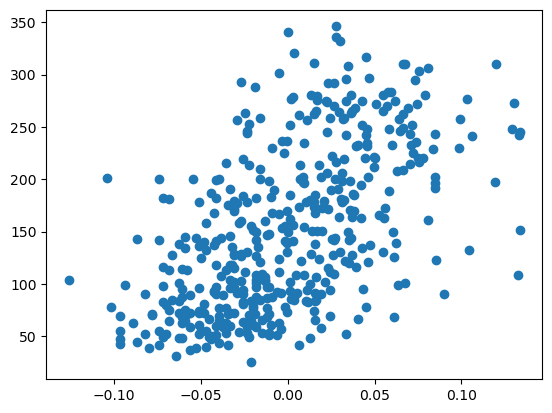

In [22]:
diabetes = datasets.load_diabetes()
x = diabetes.data[:,8]
y = diabetes.target

plt.scatter(x,y)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(86)
X_train,X_test,y_train,y_test = train_test_split(x.reshape(-1,1),y)

In [38]:
from sklearn.pipeline import Pipeline
# 用于将数据预处理步骤和模型训练步骤组合成一个流程，方便统一调用
from sklearn.preprocessing import PolynomialFeatures
# 用于生成多项式的特征
from sklearn.preprocessing import StandardScaler
# 对数据进行标准化处理，即通过计算训练数据的均值和标准差，将数据转换为均值为0、标准差为1的分布
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [68]:
poly_reg = PolynomialRegression(degree=40)
poly_reg.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=40)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [70]:
from sklearn.metrics import mean_squared_error
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

45021870925.15506

In [72]:
def show_plot(model):
    plt.scatter(x,y)
    X_plot = np.linspace(-0.15,0.15,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot[:,0],y_plot,color='red')
    plt.axis([-0.15,0.15,0,350])
    plt.show()

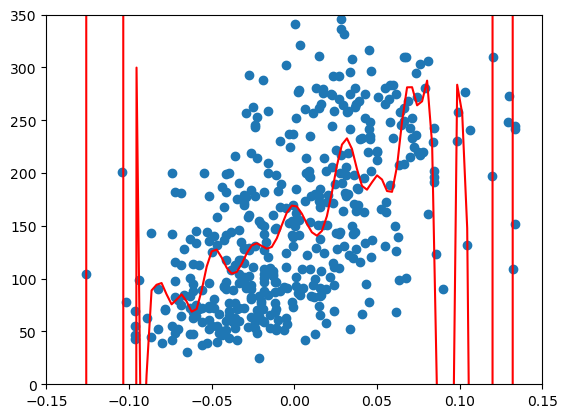

In [74]:
show_plot(poly_reg)

In [76]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("sed_scaler",StandardScaler()),
        ("lasso_reg",Lasso(alpha=alpha))
    ])
# alpha:Lasso回归的正则化参数，控制正则化强度
# alpha越大，对系数的压缩作用越强，越容易使部分系数变为零，实现特征选择

In [90]:
lasso_reg = LassoRegression(20,0.01)
lasso_reg.fit(X_train,y_train)
y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2724.988990022198

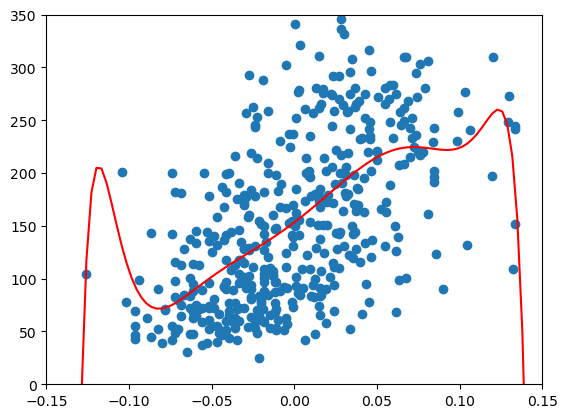

In [92]:
show_plot(lasso_reg)

### 岭回归

In [117]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("ridge_reg",Ridge(alpha=alpha))
    ])

In [134]:
ridge_reg = RidgeRegression(20, 0.01)
ridge_reg.fit(X_train,y_train)
y_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2754.0727443703395

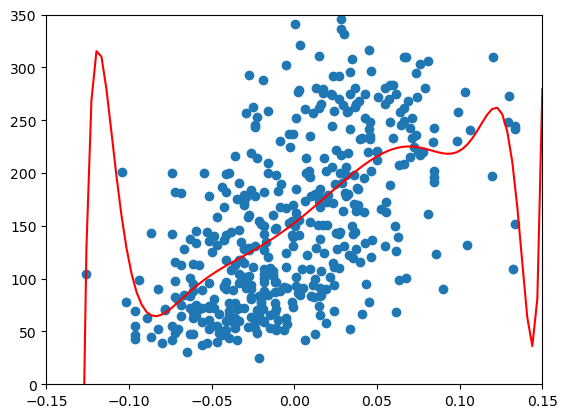

In [136]:
show_plot(ridge_reg)